In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\ML PROJECT\Christmas - Christmas.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(537577, 12)

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [8]:
df.isnull().sum()/ df.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64

# Observation:
    The feature "Product_Category_2" contain 31% null values which can be inputed where as 'Product_Category_3' contain 
    69% null values so we need to remove this feature

In [9]:
df.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [10]:
df.Stay_In_Current_City_Years.value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

<Figure size 700x500 with 0 Axes>

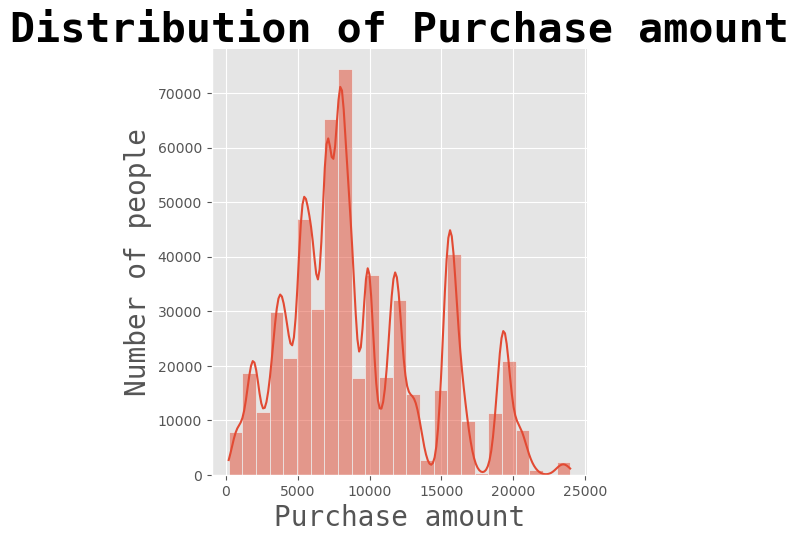

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=(7,5))
sns.displot(df['Purchase'],bins=25,kde=True)
plt.title('Distribution of Purchase amount', fontdict={"fontname":"Monospace","fontsize":30, "fontweight":"bold"})
plt.xlabel("Purchase amount",fontdict={"fontname":"Monospace","fontsize":20})
plt.ylabel("Number of people",fontdict={"fontname":"Monospace","fontsize":20})
plt.show()

It seems target variable has normal Distrubution

C:\Users\Dell\AppData\Local\Temp\ipykernel_36028\1567662688.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


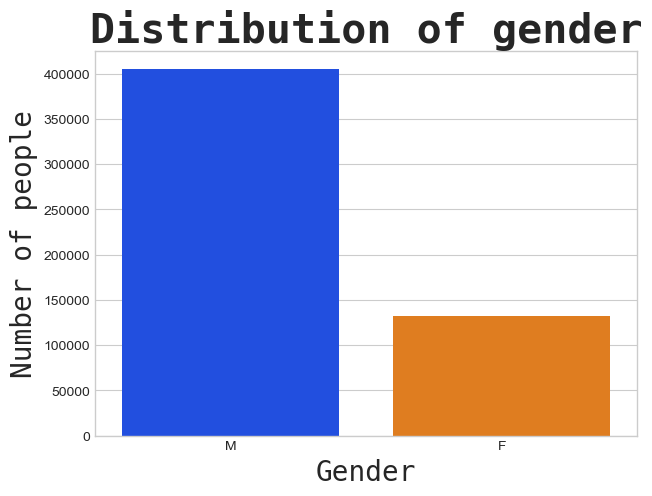

In [12]:
gen = df['Gender'].value_counts()
plt.figure(figsize=(7,5))
plt.style.use('seaborn-whitegrid')
sns.barplot(x=gen.index,y=gen.values, palette= "bright")
plt.title("Distribution of gender",fontdict={"fontname":"Monospace","fontsize":30, "fontweight":"bold"})
plt.xlabel("Gender",fontdict={"fontname":"Monospace","fontsize":20})
plt.ylabel("Number of people",fontdict={"fontname":"Monospace","fontsize":20})
plt.show()

Intrestingly most of buyers are male which is unaccepetable

C:\Users\Dell\AppData\Local\Temp\ipykernel_36028\3590451866.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


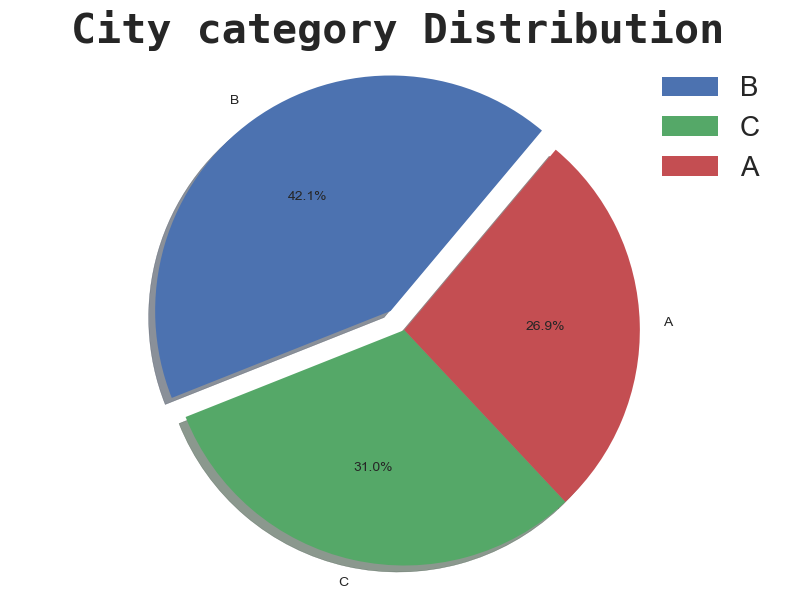

In [13]:
city = df.City_Category.value_counts()
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
plt.pie(city.values, labels=city.index, startangle= 50 , explode=(0.10,0,0), shadow=True,autopct ='%1.1f%%')
plt.title('City category Distribution', fontdict = {"fontname": 'Monospace', "fontsize":30, 'fontweight' :'bold'})
plt.legend(prop={'size':20})
plt.axis('equal')
plt.show()

From above plot we got know that most of the buyers are from city category B

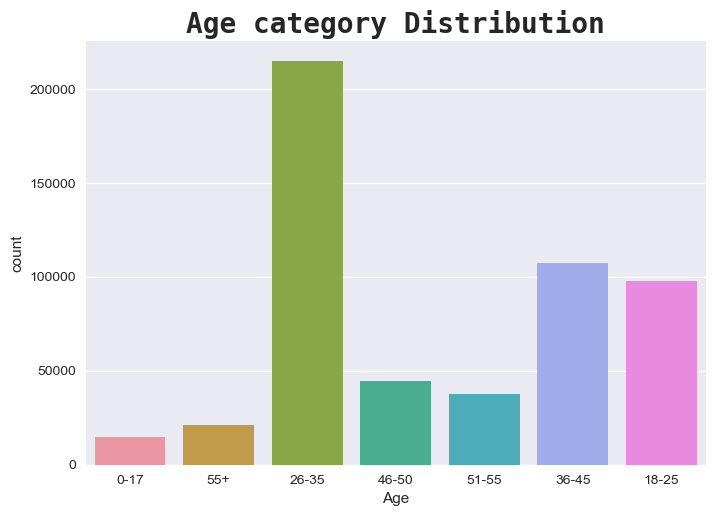

In [14]:
sns.countplot(x='Age', data=df)
plt.title('Age category Distribution', fontdict = {"fontname": 'Monospace', "fontsize":20, 'fontweight' :'bold'})
plt.show()

From above plot we get know that from  age 26 to 35 shop more than others

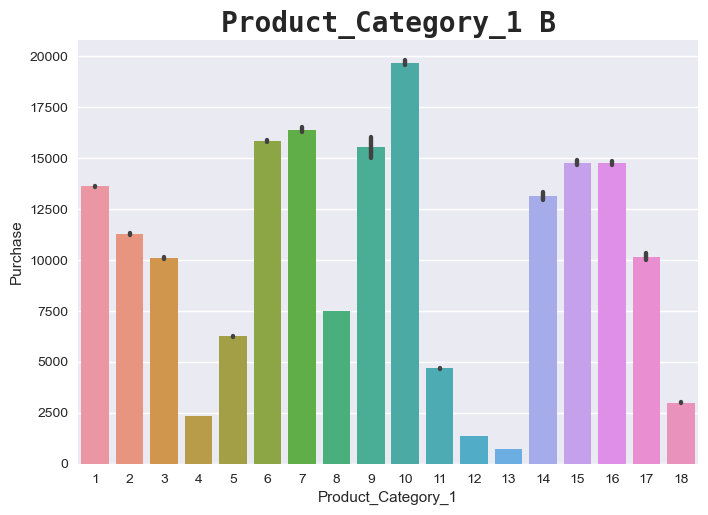

In [15]:
sns.barplot(x='Product_Category_1', y='Purchase', data=df)
plt.title('Product_Category_1 B', fontdict = {"fontname": 'Monospace', "fontsize":20, 'fontweight' :'bold'})
plt.show()

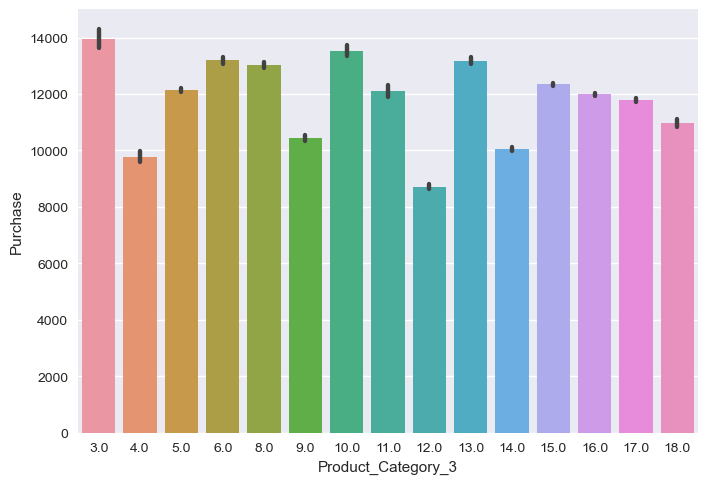

In [16]:
sns.barplot(x='Product_Category_3', y='Purchase', data=df)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_36028\248079781.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


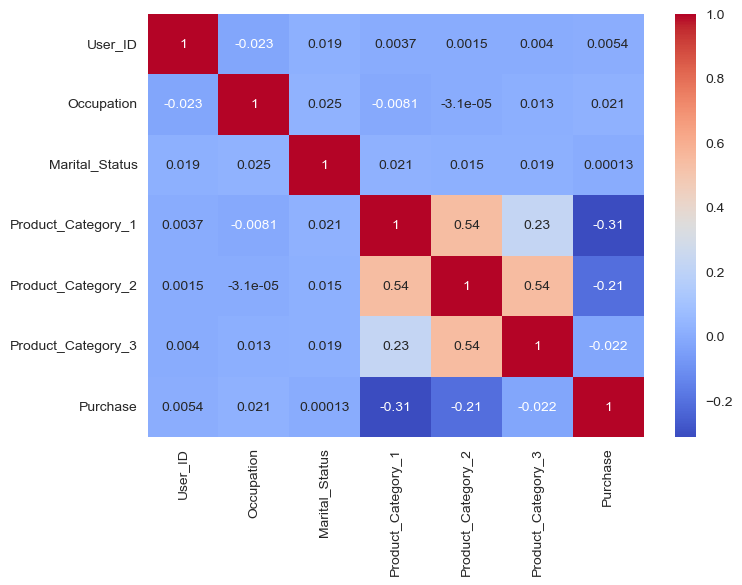

In [17]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

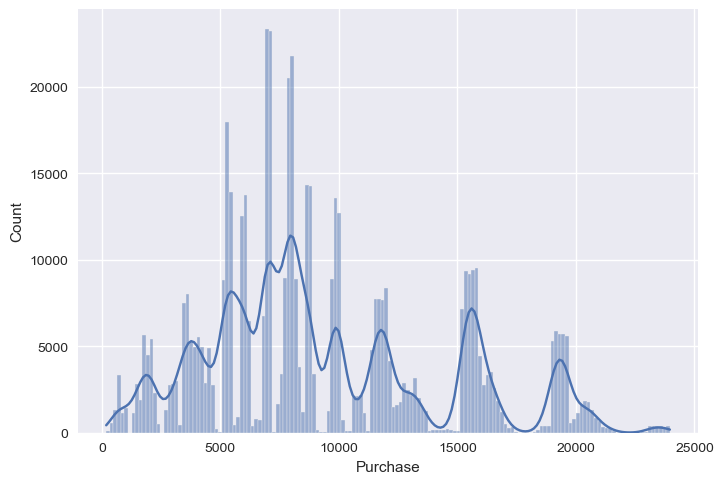

<Axes: xlabel='Purchase'>

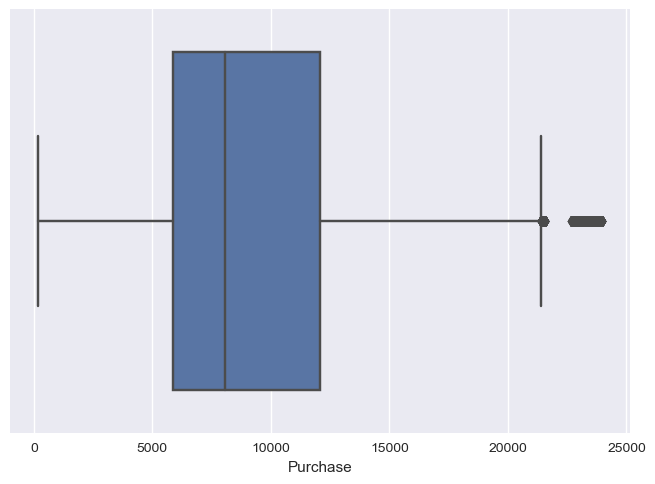

In [18]:
sns.histplot(df['Purchase'], kde=True)
plt.show()
sns.boxplot(x=df['Purchase'])

# Data Preprocessing

In [19]:
#replacing + in Age and Stay_In_Current_City_Years

In [20]:
df.Age.value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [21]:
age = {'0-17':0 ,'18-25':1 ,'26-35':2 ,'36-45':3,'46-50':4,'51-55':5,'55+':6}

In [22]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].apply(lambda x :str(x).replace('+4','4'))

In [23]:
df.drop(['User_ID','Product_ID','Product_Category_3'],axis=1,inplace=True)

In [24]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


In [25]:
df.Product_Category_2.value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [26]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].median())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      537577 non-null  object 
 1   Age                         537577 non-null  object 
 2   Occupation                  537577 non-null  int64  
 3   City_Category               537577 non-null  object 
 4   Stay_In_Current_City_Years  537577 non-null  object 
 5   Marital_Status              537577 non-null  int64  
 6   Product_Category_1          537577 non-null  int64  
 7   Product_Category_2          537577 non-null  float64
 8   Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 36.9+ MB


In [28]:
#convert all data using label -encoder

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column contains categorical data
        df[column] = le.fit_transform(df[column])

In [32]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,9.0,8370
1,0,0,10,0,2,0,1,6.0,15200
2,0,0,10,0,2,0,12,9.0,1422
3,0,0,10,0,2,0,12,14.0,1057
4,1,6,16,2,4,0,8,9.0,7969


In [33]:
df.Age.value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

# feature selection

Here we have to Drop the Purchase and Find Important Feature from Data_set

In [34]:
x = df.drop("Purchase", axis=1)
y = df.Purchase

In [35]:
x.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [36]:
from sklearn.ensemble import ExtraTreesRegressor

In [37]:
selector = ExtraTreesRegressor()

In [38]:
selector.fit(x,y)

ExtraTreesRegressor()

In [39]:
feature_imp = selector.feature_importances_

In [40]:
feature_imp

array([0.00504965, 0.02177767, 0.05074642, 0.00751844, 0.02671438,
       0.00635956, 0.78725671, 0.09457718])

In [41]:
for index ,val in enumerate(feature_imp):
    print(index , round((val*100),2))

0 0.5
1 2.18
2 5.07
3 0.75
4 2.67
5 0.64
6 78.73
7 9.46


In [42]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [43]:
x.drop(['Gender','City_Category','Marital_Status'],axis=1 ,inplace= True)

# sampling

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train ,x_test, y_train , y_test = train_test_split(x,y , test_size=0.2)

In [46]:
x_train

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
191989,3,20,4,1,16.0
275236,1,4,1,16,9.0
288470,4,9,2,5,14.0
80098,3,7,1,5,9.0
189315,2,1,3,1,15.0
...,...,...,...,...,...
405206,1,10,4,1,2.0
220303,6,0,4,8,9.0
411139,6,13,4,2,9.0
225375,2,2,3,4,5.0


In [47]:
y_train

191989    11923
275236     8085
288470     8610
80098      7067
189315    11543
          ...  
405206     4498
220303     2033
411139    13174
225375     2869
190        6139
Name: Purchase, Length: 430061, dtype: int64

# Model Building

Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lin_reg = LinearRegression()

In [50]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [51]:
pred_lin = lin_reg.predict(x_test)
pred_lin

array([ 9405.77565652, 11391.90265786, 11560.22812577, ...,
        9216.51379923,  9396.35519289,  7628.37779769])

In [52]:
from sklearn.metrics import mean_squared_error,r2_score ,mean_absolute_error

In [53]:
print('linear Regression')
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_lin)))
print('R2 score:',r2_score(y_test,pred_lin))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lin))
print('MSE',mean_squared_error(y_test,pred_lin))

linear Regression
RMSE: 4711.487430780802
R2 score: 0.10718679832912048
Mean Absolute Error: 3621.2068805773324
MSE 22198113.81040548


 KNN Regressor

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knn_rig = KNeighborsRegressor()

In [56]:
knn_rig.fit(x_train,y_train)

KNeighborsRegressor()

In [57]:
pred_knn = knn_rig.predict(x_test)
pred_knn

array([ 6051.6, 10698.2, 13347.8, ...,  5685.6,  4638. ,  8763. ])

In [58]:
print('KNN Regression')
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_knn)))
print('R2 score:',r2_score(y_test,pred_knn))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('MSE',mean_squared_error(y_test,pred_knn))

KNN Regression
RMSE: 3273.0100302121505
R2 score: 0.5691369989187391
Mean Absolute Error: 2422.280001116113
MSE 10712594.65786934


XG Boost Regressor

In [59]:
from xgboost import XGBRegressor

In [60]:
xgb = XGBRegressor()

In [61]:
xgb.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
pred_xgb = xgb.predict(x_test)
pred_xgb

array([ 5950.9033, 13682.377 , 13220.981 , ...,  5975.98  ,  5941.3926,
        8110.727 ], dtype=float32)

In [63]:
print('XGB Regression')
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_xgb)))
print('R2 score:',r2_score(y_test,pred_xgb))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_xgb))
print('MSE',mean_squared_error(y_test,pred_xgb))

XGB Regression
RMSE: 2974.4825651707665
R2 score: 0.6441496600882668
Mean Absolute Error: 2241.5609965816334
MSE 8847546.530504864
